In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\pv437\Desktop\Data Scince Folder\assignment\assignment downloads\ass 15/Fraud_check.csv', encoding='Latin1')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#Data Exploration
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.shape

(600, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df[df.duplicated()].shape

(0, 6)

In [8]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
categorical_features = df.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [12]:
numerical_features = df.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

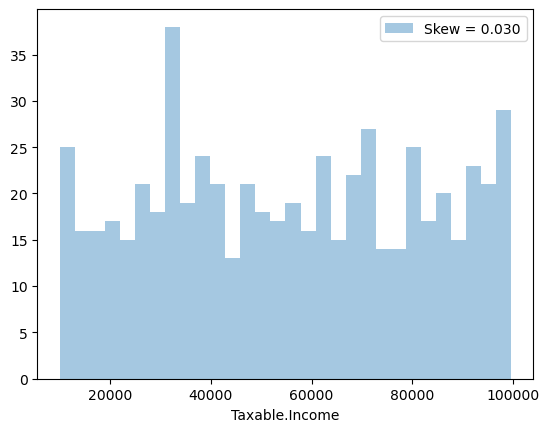

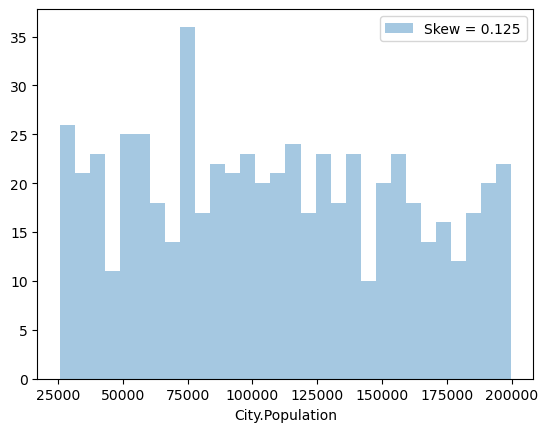

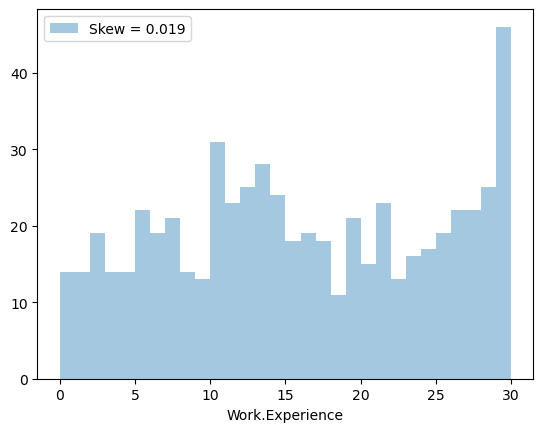

In [13]:
#Visualizing Data
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

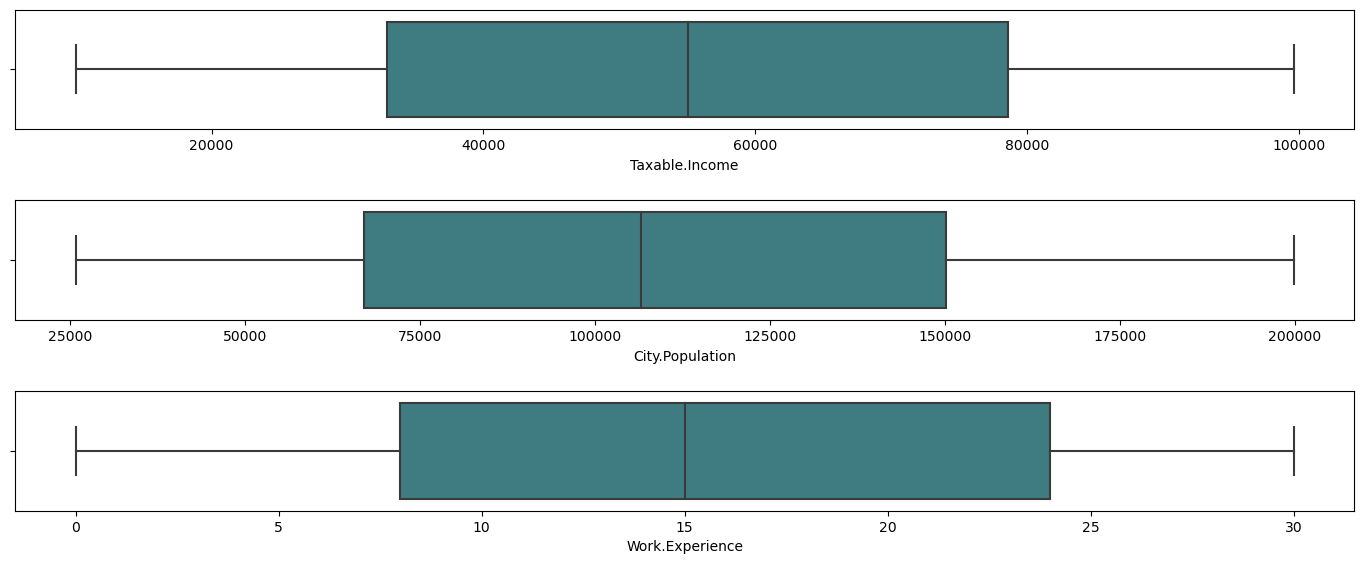

In [14]:
ot=df1.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

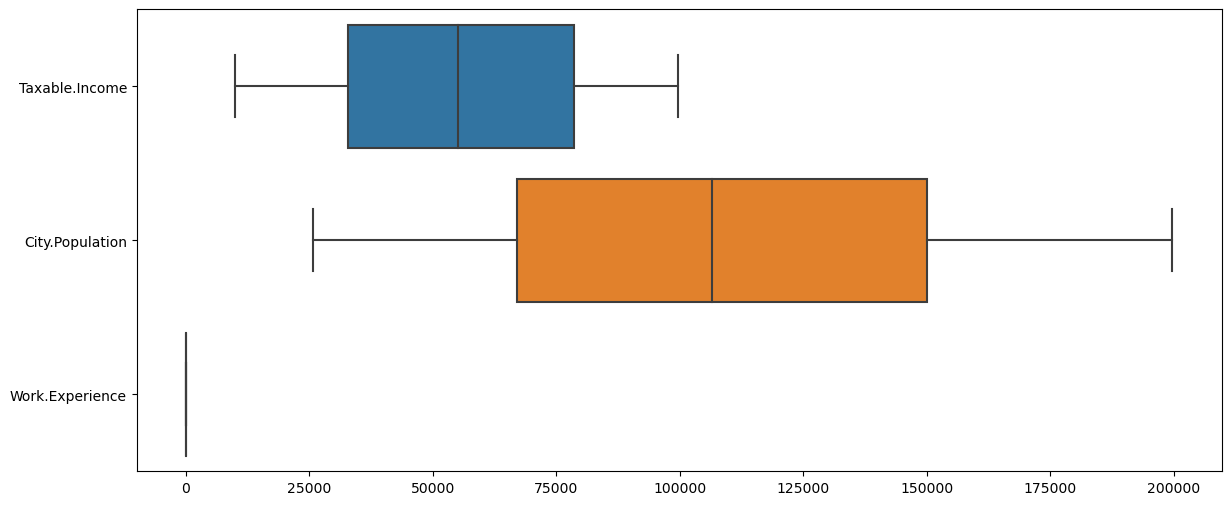

In [15]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df1[numerical_features], orient="h");

<AxesSubplot:>

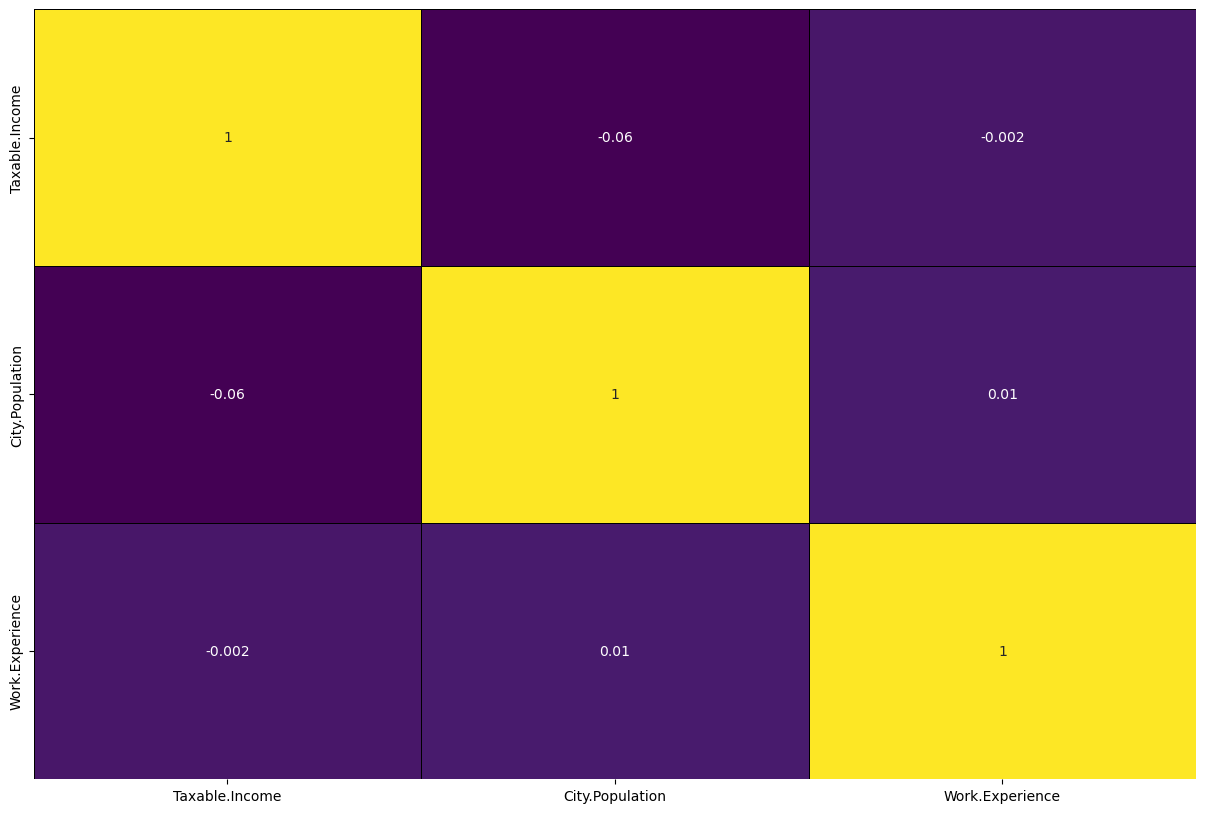

In [16]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

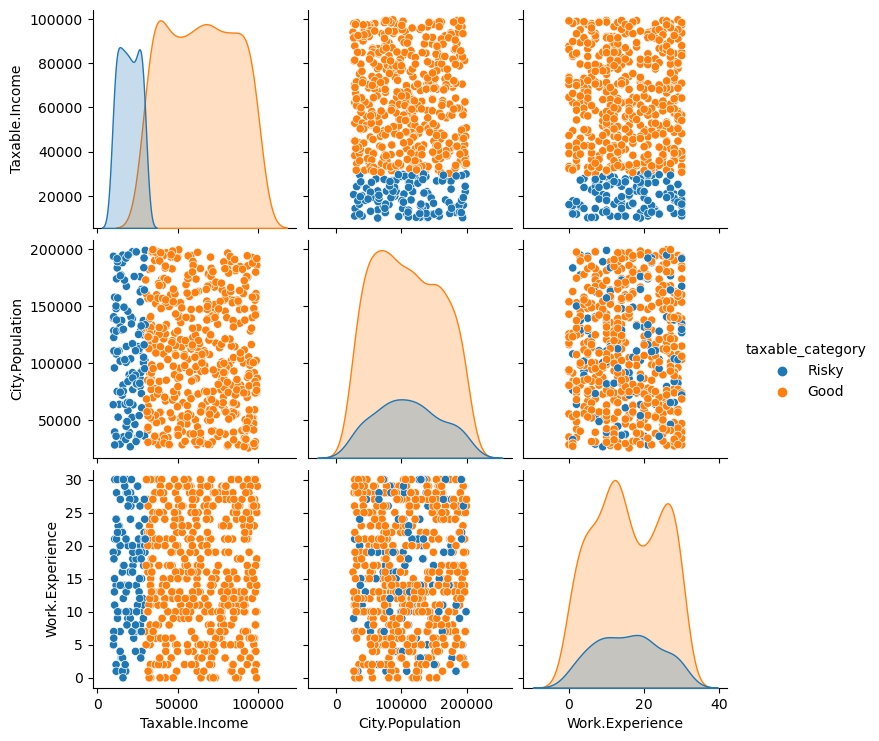

In [17]:
# ploting pair plot to visualise the attributes all at once
sns.pairplot(data=df1, hue = 'taxable_category')

In [18]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'taxable_category'],
      dtype='object')

In [19]:
countNotermdeposit = len(df1[df1['taxable_category'] == 'Good'])
counthavetermdeposit = len(df1[df1['taxable_category'] == 'Risky'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(df1.taxable_category))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(df1.taxable_category))*100)))

Percentage of Customer doesn't have a term deposit: 79.33%
Percentage of Customer have a term deposit: 20.67%


In [20]:
df1.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

Text(0.5, 1.0, 'Risky or Good for Individual Taxable Income ')

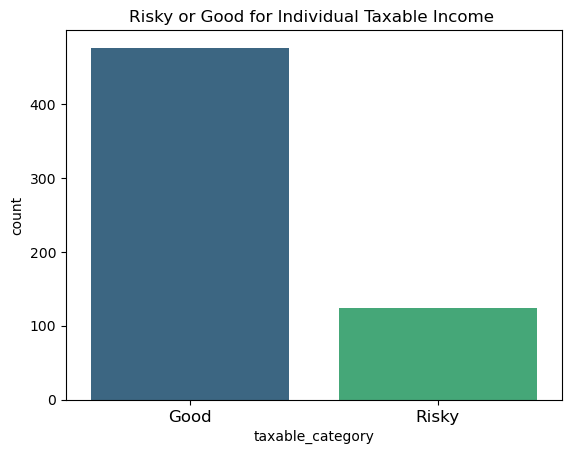

In [21]:
sns.countplot(x='taxable_category', data=df1, palette = 'viridis', order=df1['taxable_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')

In [22]:
#Changing The Name of Columns
data = df1.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [23]:
#Creating dummy vairables of the categorical features
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [24]:
data.taxable_category.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

In [25]:
A = data.drop(['taxable_category'], axis=1)
B = data['taxable_category']

In [26]:
from imblearn.under_sampling import NearMiss

# Create the NearMiss object
nm = NearMiss()

# Use the fit_resample method to perform under-sampling
x, y = nm.fit_resample(A, B)


In [27]:

#Splitting data into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,max_depth=2)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [29]:
y_pred = rf.predict(x_test)

In [30]:
data=pd.DataFrame({'Actual values':y_test,'Predicted Values':y_pred})
data

,Actual values,Predicted Values
37,0,0
175,1,1
81,0,0
160,1,0
109,0,0
...,...,...
210,1,0
120,0,0
21,0,0
36,0,0


In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 16],
       [19, 18]], dtype=int64)

In [32]:
pd.crosstab(y_test,y_pred) 

col_0,0,1
taxable_category,,
0,22,16
1,19,18


<AxesSubplot:>

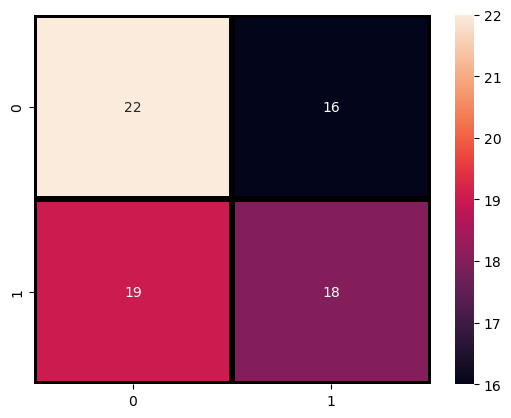

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [34]:
print('Classification Report ',classification_report(y_test,y_pred))

Classification Report                precision    recall  f1-score   support

           0       0.54      0.58      0.56        38
           1       0.53      0.49      0.51        37

    accuracy                           0.53        75
   macro avg       0.53      0.53      0.53        75
weighted avg       0.53      0.53      0.53        75



In [35]:
x.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban'],
      dtype='object')

In [36]:
cn = ['1','0']
fn = ['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban']

In [37]:
from sklearn.model_selection import  cross_val_score
num_trees = 100
max_features = 5
rf1 = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(rf, x, y, cv=10)
print(results.mean())

0.5066666666666667


In [38]:
# choosing k between 1 to 41
num_trees = [10,20,50,100,200,300,400,500,600,700,800,900,1000]
nf=[2,3,4,5,6,7]
k_scores = []

for k in num_trees:
    rf = RandomForestClassifier(criterion= "gini",max_samples=0.8,n_estimators=k,random_state=10)
    scores = cross_val_score(rf, x, y, cv=10)
    k_scores.append(scores.mean())

In [39]:
k_scores

[0.4993333333333333,
 0.5156666666666667,
 0.45966666666666667,
 0.45499999999999996,
 0.4591666666666666,
 0.44333333333333325,
 0.43516666666666665,
 0.43933333333333335,
 0.43516666666666665,
 0.43916666666666665,
 0.43516666666666665,
 0.43133333333333335,
 0.42733333333333334]

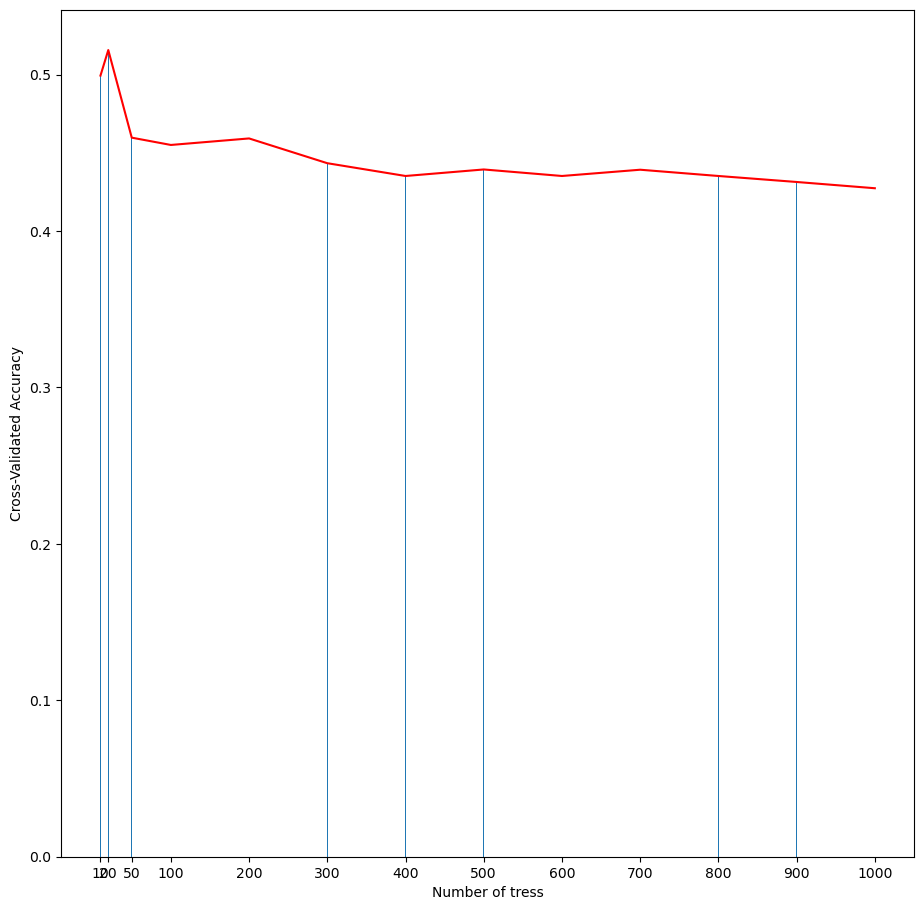

In [40]:
plt.figure(figsize=(11,11))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")
plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(num_trees)
plt.show()

In [41]:
np.argmax(k_scores)

1

In [42]:
num_trees[np.argmax(k_scores)]

20

In [43]:
num_trees = 200
rf2 = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,criterion="gini",random_state=10)
results = cross_val_score(rf2, x, y, cv=10)
print(results.mean())

0.4591666666666666


In [44]:
rf2.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=200, random_state=10)

In [45]:
y_pred2=rf2.predict(x_test)

In [46]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred2)

0.5066666666666667

In [47]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        38
           1       0.50      0.49      0.49        37

    accuracy                           0.51        75
   macro avg       0.51      0.51      0.51        75
weighted avg       0.51      0.51      0.51        75

